In [1]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_stata('SF_cleaned_data.dta')

In [3]:
#create DateTime index 
df['Date'] = pd.to_datetime(df['last_scraped'])
df.set_index('Date', inplace=True)


/var/folders/_y/qcxv13s525ndt5w209zq61fh0000gn/T/ipykernel_49708/979759236.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Date'] = pd.to_datetime(df['last_scraped'])


In [4]:
#first 5 rows
df[:5]

,id,month,list_month,last_scraped,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,...,neigh_listings,lag_neigh_lists,delta_reviews,id_max_delta_reviews,id_minDSR,id_minCALUP,id_max_avail365,id_max_RPM,id_max_entrant,id_min_minnights
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-02,958,0,1,2015-09-02,1169,Holly,2008-07-31,"San Francisco, California, United States",within a day,80%,...,578.0,NaN,NaN,9.0,2.0,0.0,318.0,11.9,0.0,1.0
2015-11-01,958,1,1,2015-11-01,1169,Holly,2008-07-31,"San Francisco, California, United States",within a day,88%,...,669.0,578.0,2.0,9.0,2.0,0.0,318.0,11.9,0.0,1.0
2015-12-02,958,2,1,2015-12-02,1169,Holly,2008-07-31,"San Francisco, California, United States",within a day,80%,...,673.0,669.0,1.0,9.0,2.0,0.0,318.0,11.9,0.0,1.0
2016-02-02,958,3,1,2016-02-02,1169,Holly,2008-07-31,"San Francisco, California, United States",within a day,80%,...,705.0,673.0,3.0,9.0,2.0,0.0,318.0,11.9,0.0,1.0
2016-04-03,958,4,1,2016-04-03,1169,Holly,2008-07-31,"San Francisco, California, United States",within a day,86%,...,692.0,705.0,5.0,9.0,2.0,0.0,318.0,11.9,0.0,1.0


##### July 2017 vs July 2018

In [5]:
#masks to select July 2017 and July 2018
july2017 = df[(df.index >= '2017-07-01') & (df.index < '2017-08-01')]
july2018 = df[(df.index >= '2018-07-01') & (df.index < '2018-08-01')]


In [6]:
july2017['availability_365'].describe()

count    6135.000000
mean      137.398533
std       130.902293
min         0.000000
25%         9.000000
50%        90.000000
75%       279.000000
max       365.000000
Name: availability_365, dtype: float64

In [7]:
july2018['availability_365'].describe()

count    4030.000000
mean      129.765261
std       121.813913
min         0.000000
25%        15.000000
50%        87.000000
75%       255.000000
max       365.000000
Name: availability_365, dtype: float64

##### December 2017 vs December 2018

In [8]:
dec2017 = df[(df.index >= '2017-12-01') & (df.index < '2018-01-01')]
dec2018 = df[(df.index >= '2018-12-01') & (df.index < '2019-01-01')]


In [9]:
dec2017['availability_365'].describe()

count    11265.000000
mean       143.169463
std        135.726440
min          0.000000
25%         13.000000
50%         89.000000
75%        296.000000
max        365.000000
Name: availability_365, dtype: float64

In [10]:
dec2018['availability_365'].describe()

count    4987.000000
mean      152.591337
std       129.892914
min         0.000000
25%        32.500000
50%       120.000000
75%       286.000000
max       365.000000
Name: availability_365, dtype: float64

##### Histograms

Text(0.5, 1.0, 'July 2018')

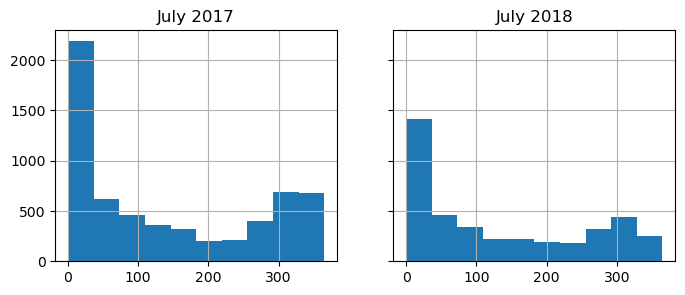

In [11]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = subplots(nrows=1, 
                                sharex = True,
                                sharey = True,
                                ncols=2,
                                figsize=(8, 3))

ax1 = july2017['availability_365'].hist(ax = ax1)
ax1.set_title("July 2017")

ax2 = july2018['availability_365'].hist(ax = ax2)
ax2.set_title("July 2018")

Text(0.5, 1.0, 'December 2018')

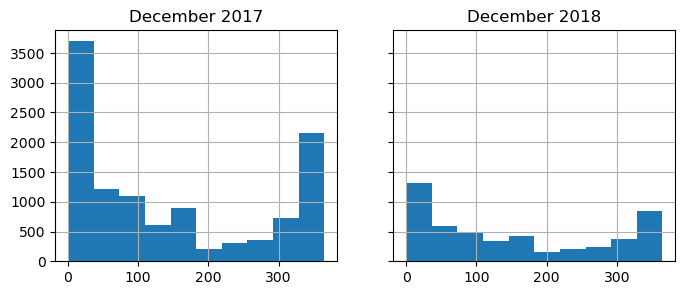

In [12]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = subplots(nrows=1, 
                                sharex = True,
                                sharey = True,
                                ncols=2,
                                figsize=(8, 3))

ax1 = dec2017['availability_365'].hist(ax = ax1)
ax1.set_title("December 2017")

ax2 = dec2018['availability_365'].hist(ax = ax2)
ax2.set_title("December 2018")

##### 10 hosts differences in availability_365, price, number_of_reviews, reviews_per_month, delta_reviews, days_since_rev


In [250]:
##### July 2017 vs July 2018

In [251]:
# select columns we want
a = july2017[['host_id', 'availability_365', 'price', 'number_of_reviews', 'reviews_per_month', 'delta_reviews', 'days_since_rev' ]]

In [252]:
# reset index to make comparisons
a.set_index('host_id', inplace=True)
a

,availability_365,price,number_of_reviews,reviews_per_month,delta_reviews,days_since_rev
host_id,,,,,,
1169,239.0,170.0,89.0,0.92,1.0,31.0
3163,NaN,NaN,NaN,NaN,NaN,NaN
7191,42.0,152.0,4.0,0.05,0.0,191.0
7476,NaN,NaN,NaN,NaN,NaN,NaN
10038,350.0,181.0,37.0,0.37,NaN,546.0
...,...,...,...,...,...,...
233914298,NaN,NaN,NaN,NaN,NaN,NaN
233914298,NaN,NaN,NaN,NaN,NaN,NaN
39729330,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
b = july2018[['host_id', 'availability_365', 'price', 'number_of_reviews', 'reviews_per_month', 'delta_reviews', 'days_since_rev' ]]
b.set_index('host_id', inplace=True)
b

,availability_365,price,number_of_reviews,reviews_per_month,delta_reviews,days_since_rev
host_id,,,,,,
1169,134.0,170.0,143.0,1.31,9.0,15.0
3163,NaN,NaN,NaN,NaN,NaN,NaN
7191,NaN,NaN,NaN,NaN,NaN,NaN
7476,NaN,NaN,NaN,NaN,NaN,NaN
10038,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
233914298,NaN,NaN,NaN,NaN,NaN,NaN
233914298,NaN,NaN,NaN,NaN,NaN,NaN
39729330,NaN,NaN,NaN,NaN,NaN,NaN


##### Availability_356

In [254]:
## Availability_365
availability_diff = b['availability_365'] - a['availability_365']
availability_diff.dropna()[:10]

host_id
1169    -105.0
8904       3.0
21994      0.0
22402   -141.0
21994    -28.0
24215      0.0
25601     16.0
7149    -107.0
29674    -39.0
35199    -43.0
Name: availability_365, dtype: float64

In [255]:
availability_diff.dropna().describe()

count    2781.000000
mean      -23.363538
std        91.644754
min      -365.000000
25%       -45.000000
50%       -10.000000
75%         8.000000
max       344.000000
Name: availability_365, dtype: float64

##### Price

In [256]:
## Price
price_diff = b['price'] - a['price']
price_diff.dropna()[:10]

host_id
1169       0.0
8904       0.0
21994      0.0
22402      3.0
21994      0.0
24215    100.0
25601      0.0
7149       0.0
29674      0.0
35199     15.0
Name: price, dtype: float64

In [257]:
price_diff.dropna().describe()

count    2781.000000
mean        4.211075
std        52.162354
min      -710.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       650.000000
Name: price, dtype: float64

##### number_of_reviews	

In [124]:
## Number of Reviews
num_rev_diff = b['number_of_reviews'] - a['number_of_reviews']
num_rev_diff.dropna()[:10]

host_id
1169     54.0
8904      1.0
21994     0.0
22402    24.0
21994     1.0
24215     3.0
25601     3.0
7149     99.0
29674    54.0
35199    35.0
Name: number_of_reviews, dtype: float64

In [120]:
num_rev_diff.dropna().describe()

count    2781.00000
mean       26.19813
std        26.00574
min         0.00000
25%         5.00000
50%        18.00000
75%        41.00000
max       135.00000
Name: number_of_reviews, dtype: float64

##### Reviews_per_month

In [114]:
## Reviews per month
rev_mon_diff = b['reviews_per_month'] - a['reviews_per_month']
rev_mon_diff.dropna()[:10]

host_id
1169     0.39
8904    -0.12
21994   -0.02
22402    0.16
21994   -0.02
24215    0.00
25601    0.00
7149     0.34
29674    0.08
35199    0.02
Name: reviews_per_month, dtype: float32

In [121]:
rev_mon_diff.dropna().describe()

count    2655.000000
mean       -0.038283
std         0.733098
min        -5.240000
25%        -0.210000
50%        -0.010000
75%         0.160000
max         5.680000
Name: reviews_per_month, dtype: float64

##### Delta Reviews

In [116]:
## Delta Reviews
delta_diff = b['delta_reviews'] - a['delta_reviews']
delta_diff.dropna()[:10]

host_id
1169     8.0
8904     0.0
21994    0.0
22402    1.0
21994    0.0
24215    0.0
25601    0.0
7149     6.0
29674    8.0
35199    6.0
Name: delta_reviews, dtype: float32

In [122]:
delta_diff.dropna().describe()

count    2588.000000
mean        2.058733
std         3.825078
min       -11.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        23.000000
Name: delta_reviews, dtype: float64

##### Days Since Review

In [125]:
## Days Since Review
days_diff = b['days_since_rev'] - a['days_since_rev']
days_diff.dropna()[:10]

host_id
1169     -16.0
8904      66.0
21994    368.0
22402     26.0
21994    -83.0
24215    -93.0
25601    -66.0
7149       1.0
29674     -8.0
35199    -15.0
Name: days_since_rev, dtype: float32

In [126]:
days_diff.dropna().describe()

count    2655.000000
mean       14.997363
std       167.340439
min     -1763.000000
25%       -11.000000
50%         2.000000
75%        31.000000
max       368.000000
Name: days_since_rev, dtype: float64

##### OCT2017 vs OCT2018

In [312]:
oct2017 = df[(df.index >= '2017-10-01') & (df.index < '2017-11-01')]
oct2018 = df[(df.index >= '2018-10-01') & (df.index < '2018-11-01')]

In [313]:
c = oct2017[['host_id', 'availability_365', 'price', 'number_of_reviews', 'reviews_per_month', 'delta_reviews', 'days_since_rev' ]]
c.sort_values(by = 'Date', inplace = True)
c.set_index('host_id', inplace=True)

/var/folders/_y/qcxv13s525ndt5w209zq61fh0000gn/T/ipykernel_49708/2225010455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c.sort_values(by = 'Date', inplace = True)


In [314]:
c

,availability_365,price,number_of_reviews,reviews_per_month,delta_reviews,days_since_rev
host_id,,,,,,
1169,160.0,170.0,109.0,1.09,4.0,21.0
95787300,NaN,NaN,NaN,NaN,NaN,NaN
95792940,NaN,NaN,NaN,NaN,NaN,NaN
6225035,NaN,NaN,NaN,NaN,NaN,NaN
14766201,208.0,225.0,4.0,0.35,0.0,62.0
...,...,...,...,...,...,...
10765395,NaN,NaN,NaN,NaN,NaN,NaN
37624778,106.0,700.0,24.0,0.89,0.0,219.0
17018982,88.0,115.0,40.0,1.48,1.0,18.0


In [315]:
d = oct2018[['host_id', 'availability_365', 'price', 'number_of_reviews', 'reviews_per_month', 'delta_reviews', 'days_since_rev' ]]
d.sort_values(by = 'Date', inplace = True)
d.set_index('host_id', inplace=True)


/var/folders/_y/qcxv13s525ndt5w209zq61fh0000gn/T/ipykernel_49708/1642452297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.sort_values(by = 'Date', inplace = True)


In [316]:
d

,availability_365,price,number_of_reviews,reviews_per_month,delta_reviews,days_since_rev
host_id,,,,,,
1169,140.0,170.0,160.0,1.43,4.0,16.0
95787300,NaN,NaN,NaN,NaN,NaN,NaN
95792940,NaN,NaN,NaN,NaN,NaN,NaN
6225035,NaN,NaN,NaN,NaN,NaN,NaN
14766201,242.0,225.0,6.0,0.25,0.0,273.0
...,...,...,...,...,...,...
10765395,NaN,NaN,NaN,NaN,NaN,NaN
37624778,NaN,NaN,NaN,NaN,NaN,NaN
17018982,NaN,NaN,NaN,NaN,NaN,NaN


##### Availability_365

In [317]:
## Availability_365
availability_diff = d['availability_365'] - c['availability_365']
availability_diff.dropna()[:10]


host_id
1169        -20.0
14766201     34.0
53614586    -40.0
95958962      0.0
46243268    -90.0
7898856      11.0
51003        86.0
1787588    -236.0
15103537      1.0
260426      -24.0
Name: availability_365, dtype: float64

In [318]:
availability_diff.dropna().describe()

count    3004.000000
mean      -15.901132
std        91.103352
min      -363.000000
25%       -37.250000
50%        -5.000000
75%        13.000000
max       348.000000
Name: availability_365, dtype: float64

##### Price

In [319]:
## Price
price_diff = d['price'] - c['price']
price_diff.dropna()[:10]

host_id
1169         0.0
14766201     0.0
53614586    20.0
95958962     0.0
46243268     0.0
7898856      0.0
51003        0.0
1787588      0.0
15103537     0.0
260426       0.0
Name: price, dtype: float64

In [320]:
price_diff.dropna().describe()

count    3004.000000
mean        2.985686
std        56.527799
min      -680.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       701.000000
Name: price, dtype: float64

##### number_of_reviews	

In [321]:
## Number of Reviews
num_rev_diff = d['number_of_reviews'] - c['number_of_reviews']
num_rev_diff.dropna()[:10]

host_id
1169        51.0
14766201     2.0
53614586    60.0
95958962     0.0
46243268    32.0
7898856      2.0
51003        0.0
1787588     55.0
15103537     3.0
260426      23.0
Name: number_of_reviews, dtype: float64

In [322]:
num_rev_diff.dropna().describe()

count    3004.000000
mean       25.205726
std        26.076777
min         0.000000
25%         4.000000
50%        15.500000
75%        40.000000
max       141.000000
Name: number_of_reviews, dtype: float64

##### reviews_per_month	


In [323]:
## Reviews per month
rev_mon_diff = d['reviews_per_month'] - c['reviews_per_month']
rev_mon_diff.dropna()[:10]

host_id
1169        0.34
14766201   -0.10
53614586    0.88
95958962   -0.80
46243268    0.05
7898856    -0.78
51003      -0.11
1787588    -0.18
15103537   -1.31
260426      0.47
Name: reviews_per_month, dtype: float32

In [324]:
rev_mon_diff.dropna().describe()

count    2900.000000
mean       -0.163538
std         0.807625
min        -9.059999
25%        -0.320000
50%        -0.050000
75%         0.090000
max        10.580000
Name: reviews_per_month, dtype: float64

##### delta_reviews	

In [325]:
## Delta Reviews
delta_diff = d['delta_reviews'] - c['delta_reviews']
delta_diff.dropna()[:10]

host_id
1169        0.0
14766201    0.0
53614586   -2.0
95958962   -1.0
1787588    -3.0
15103537    0.0
260426     -1.0
1340541     0.0
1994513     3.0
861262      0.0
Name: delta_reviews, dtype: float32

In [326]:
delta_diff.dropna().describe()

count    2710.000000
mean       -0.615867
std         2.332071
min       -12.000000
25%        -2.000000
50%         0.000000
75%         0.000000
max        14.000000
Name: delta_reviews, dtype: float64

##### days_since_rev

In [327]:
## Days Since Review
days_diff = d['days_since_rev'] - c['days_since_rev']
days_diff.dropna()[:10]

host_id
1169         -5.0
14766201    211.0
53614586     10.0
95958962    366.0
46243268     -3.0
7898856     300.0
51003       366.0
1787588      -5.0
15103537    155.0
260426        3.0
Name: days_since_rev, dtype: float32

In [328]:
days_diff.dropna().describe()

count    2900.000000
mean       30.122414
std       156.603226
min     -1800.000000
25%        -8.000000
50%         3.000000
75%        36.000000
max       366.000000
Name: days_since_rev, dtype: float64